In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [117]:
# Load datasets
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")

# Preview data
fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [118]:
# Shape of the dataset
fraud_df.shape


(151112, 11)

In [119]:
# Data types and missing values
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [120]:
# Statistical summary of numerical features
fraud_df.describe()


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [121]:
fraud_df.isnull().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [123]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])



In [124]:
fraud_df['ip_address'] = fraud_df['ip_address'].astype(np.int64)


In [125]:
# Check duplicates
duplicates = fraud_df.duplicated().sum()
duplicates


np.int64(0)

In [126]:
# Remove duplicates if any
fraud_df = fraud_df.drop_duplicates()


In [127]:
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB


In [128]:
fraud_df.to_csv("../data/processed/fraud_data_cleaned.csv", index=False)


In [129]:
# Class distribution
class_counts = fraud_df['class'].value_counts()
class_counts
# Percentage distribution
class_percent = fraud_df['class'].value_counts(normalize=True) * 100
class_percent


class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

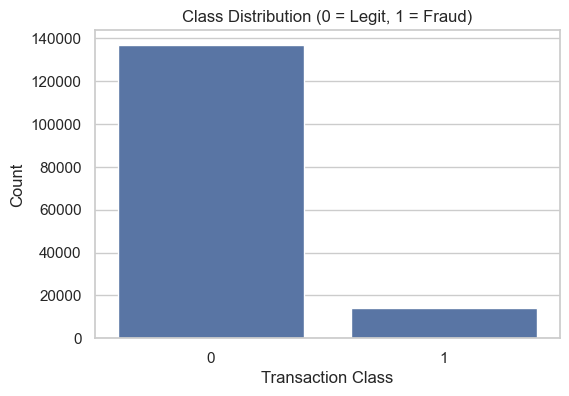

In [130]:
# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=fraud_df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()


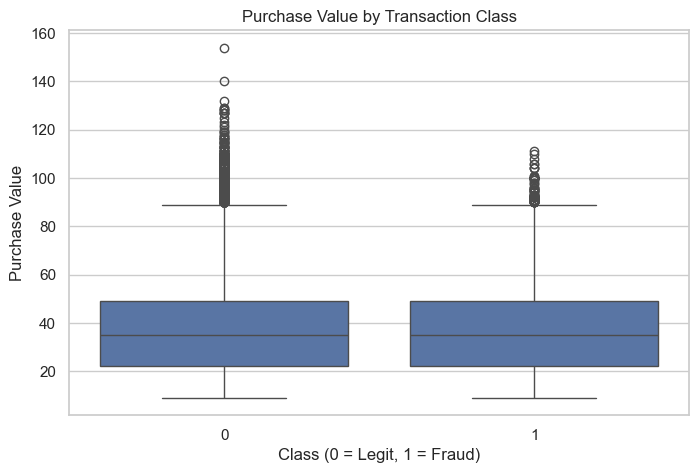

In [131]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Purchase Value by Transaction Class")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Purchase Value")
plt.show()


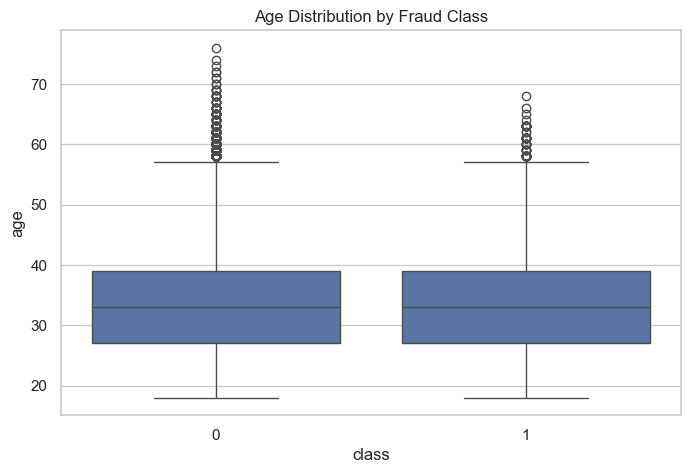

In [132]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='age', data=fraud_df)
plt.title("Age Distribution by Fraud Class")
plt.show()


In [133]:
fraud_by_source = fraud_df.groupby('source')['class'].mean().sort_values(ascending=False)
fraud_by_source


source
Direct    0.105370
Ads       0.092066
SEO       0.089285
Name: class, dtype: float64

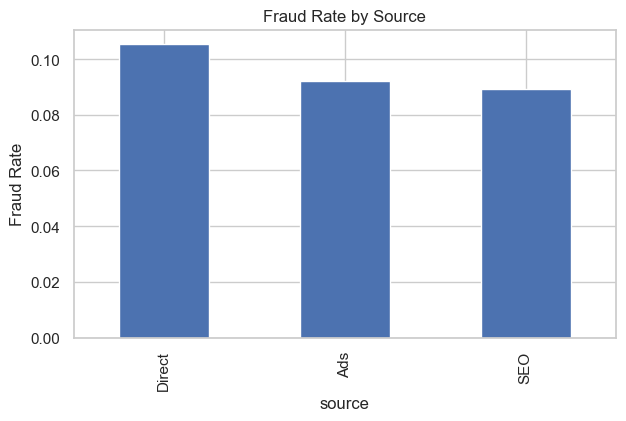

In [134]:
fraud_by_source.plot(kind='bar', figsize=(7,4), title="Fraud Rate by Source")
plt.ylabel("Fraud Rate")
plt.show()


In [135]:
fraud_by_browser = fraud_df.groupby('browser')['class'].mean().sort_values(ascending=False)
fraud_by_browser


browser
Chrome     0.098792
FireFox    0.095165
Safari     0.090201
Opera      0.089227
IE         0.086775
Name: class, dtype: float64

In [136]:
fraud_df['time_since_signup'] = (
    fraud_df['purchase_time'] - fraud_df['signup_time']
).dt.total_seconds() / 3600  # hours


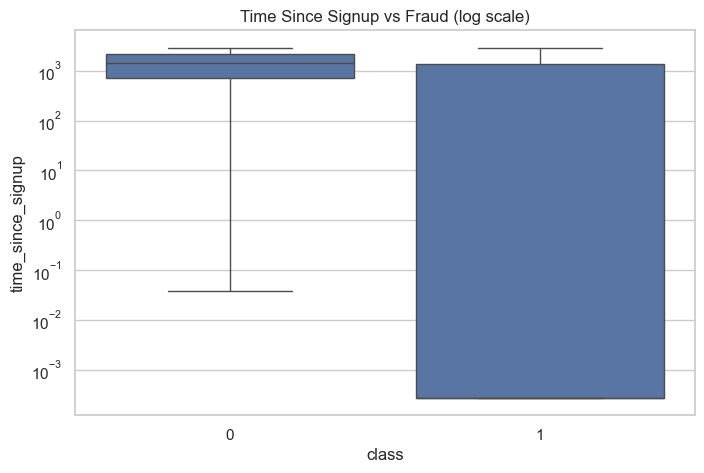

In [137]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='time_since_signup', data=fraud_df)
plt.yscale('log')
plt.title("Time Since Signup vs Fraud (log scale)")
plt.show()


In [138]:
ip_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [139]:
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(np.int64)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(np.int64)


In [140]:
fraud_df = fraud_df.sort_values('ip_address')
ip_df = ip_df.sort_values('lower_bound_ip_address')
fraud_geo = pd.merge_asof(
    fraud_df,
    ip_df,
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='backward'
)
fraud_geo = fraud_geo[
    fraud_geo['ip_address'] <= fraud_geo['upper_bound_ip_address']
]
fraud_geo[['ip_address', 'country']].head()
fraud_geo['country'].value_counts().head(10)





country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Italy                 1944
Name: count, dtype: int64

In [141]:
fraud_by_country = (
    fraud_geo.groupby('country')['class']
    .mean()
    .sort_values(ascending=False)
)

fraud_by_country.head(10)


country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64

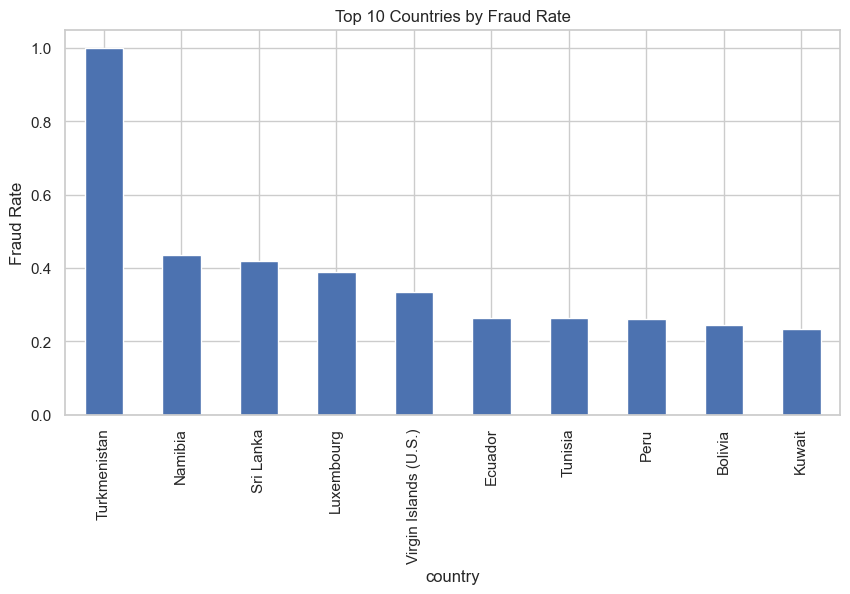

In [142]:
plt.figure(figsize=(10,5))
fraud_by_country.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Fraud Rate")
plt.ylabel("Fraud Rate")
plt.show()


In [145]:
fraud_geo['hour_of_day'] = fraud_geo['purchase_time'].dt.hour
fraud_geo['day_of_week'] = fraud_geo['purchase_time'].dt.dayofweek

fraud_geo['time_since_signup'] = (
    fraud_geo['purchase_time'] - fraud_geo['signup_time']
).dt.total_seconds() / 3600  # hours


In [146]:
# Ensure datetime
fraud_geo['purchase_time'] = pd.to_datetime(fraud_geo['purchase_time'])

# Sort before rolling
fraud_geo = fraud_geo.sort_values(['user_id', 'purchase_time'])

# Compute rolling transaction count (SAFE)
transactions_24h = (
    fraud_geo
    .groupby('user_id')
    .rolling('24h', on='purchase_time')['purchase_value']
    .count()
)

# Assign using values to avoid index conflict
fraud_geo['transactions_last_24h'] = transactions_24h.values.astype(int)


In [108]:
columns_to_drop = [
    'user_id',
    'device_id',
    'signup_time',
    'purchase_time',
    'ip_address',
    'lower_bound_ip_address',
    'upper_bound_ip_address'
]

fraud_geo = fraud_geo.drop(columns=columns_to_drop)


In [148]:
fraud_geo_encoded = pd.get_dummies(
    fraud_geo,
    columns=['source', 'browser', 'sex', 'country'],
    drop_first=True
)


In [152]:
num_cols = [
    'purchase_value',
    'age',
    'time_since_signup',
    'transactions_last_24h'
]

scaler = StandardScaler()
fraud_geo_encoded[num_cols] = scaler.fit_transform(
    fraud_geo_encoded[num_cols]
)


In [153]:
print(fraud_geo_encoded.shape)
print(fraud_geo_encoded.dtypes)


(129146, 201)
user_id                                   int64
signup_time                      datetime64[ns]
purchase_time                    datetime64[ns]
purchase_value                          float64
device_id                                object
                                      ...      
country_Viet Nam                           bool
country_Virgin Islands (U.S.)              bool
country_Yemen                              bool
country_Zambia                             bool
country_Zimbabwe                           bool
Length: 201, dtype: object


In [154]:
fraud_geo_encoded[num_cols].dtypes


purchase_value           float64
age                      float64
time_since_signup        float64
transactions_last_24h    float64
dtype: object

In [157]:
fraud_geo_encoded.to_csv(
    "../data/processed/fraud_processed.csv",
    index=False
)
